This analysis is a demonstration of simple machine learning techniques applied on the property market of the UAE 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


The following is a database set up from a CSV file using pandas

In [2]:


import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path_matches = 'properties_data.csv'
property_data = pd.read_csv(file_path_matches)
property_data


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


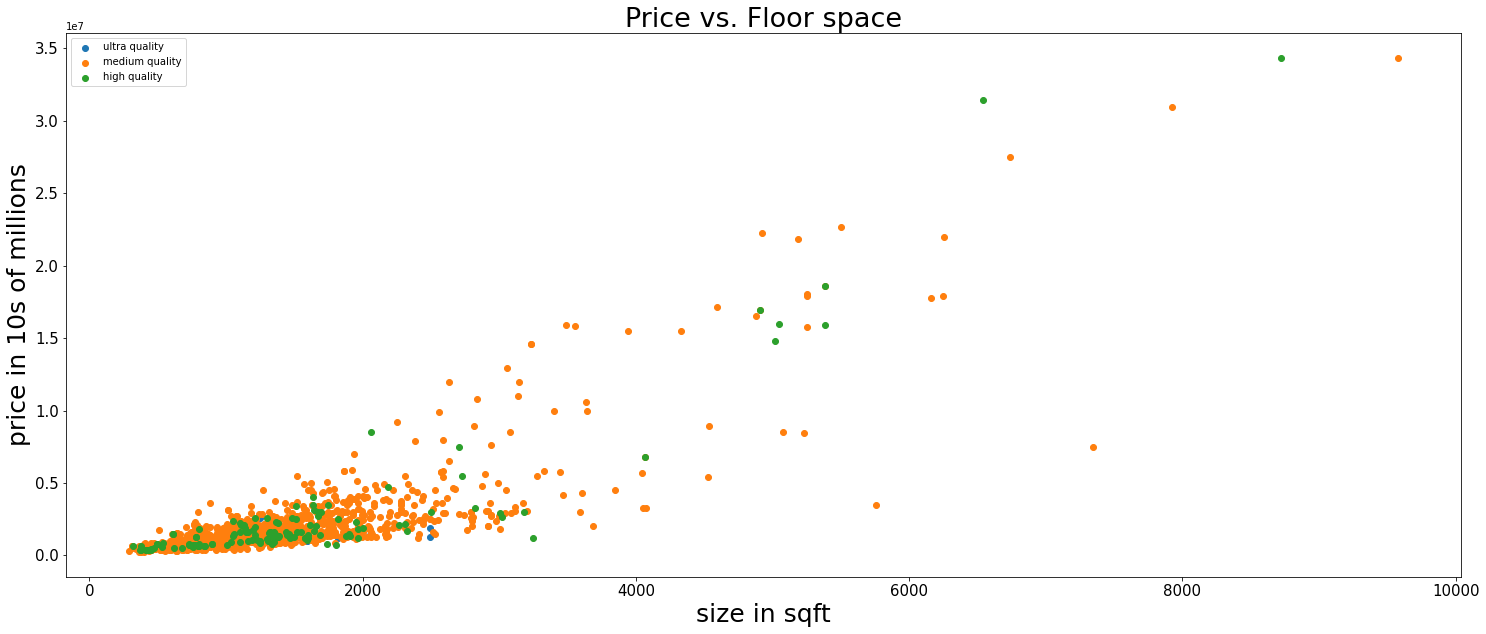

In [3]:
lowq = property_data[property_data['quality'] == 'Low'].sort_values(by='size_in_sqft', ascending = False).reset_index()

mediumq = property_data[property_data['quality'] == 'Medium'].sort_values(by='size_in_sqft', ascending = False).reset_index()

highq = property_data[property_data['quality'] == 'High'].sort_values(by='size_in_sqft', ascending = False).reset_index()

ultraq = property_data[property_data['quality'] == 'Ultra'].sort_values(by='size_in_sqft', ascending = False).reset_index()

plt.figure(figsize=(25,10))

plt.tick_params(axis='both', which = 'major', labelsize= 15)

plt.xlabel('size in sqft', fontsize = 25)

plt.ylabel('price in 10s of millions', fontsize = 25)

plt.title('Price vs. Floor space', fontsize = 27)

#plt.scatter(lowq.size_in_sqft, lowq.price)

plt.scatter(ultraq.size_in_sqft, ultraq.price)

plt.scatter(mediumq.size_in_sqft, mediumq.price)

plt.scatter(highq.size_in_sqft, highq.price)

plt.legend(['ultra quality', 'medium quality', 'high quality'])

/var/folders/b5/r0nqmvnd2gj260hkgf4kt_1m0000gn/T/ipykernel_45755/2867692088.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ultraq = property_data_sample[property_data['quality'] == 'Ultra'].sort_values(by='size_in_sqft', ascending = False).reset_index()


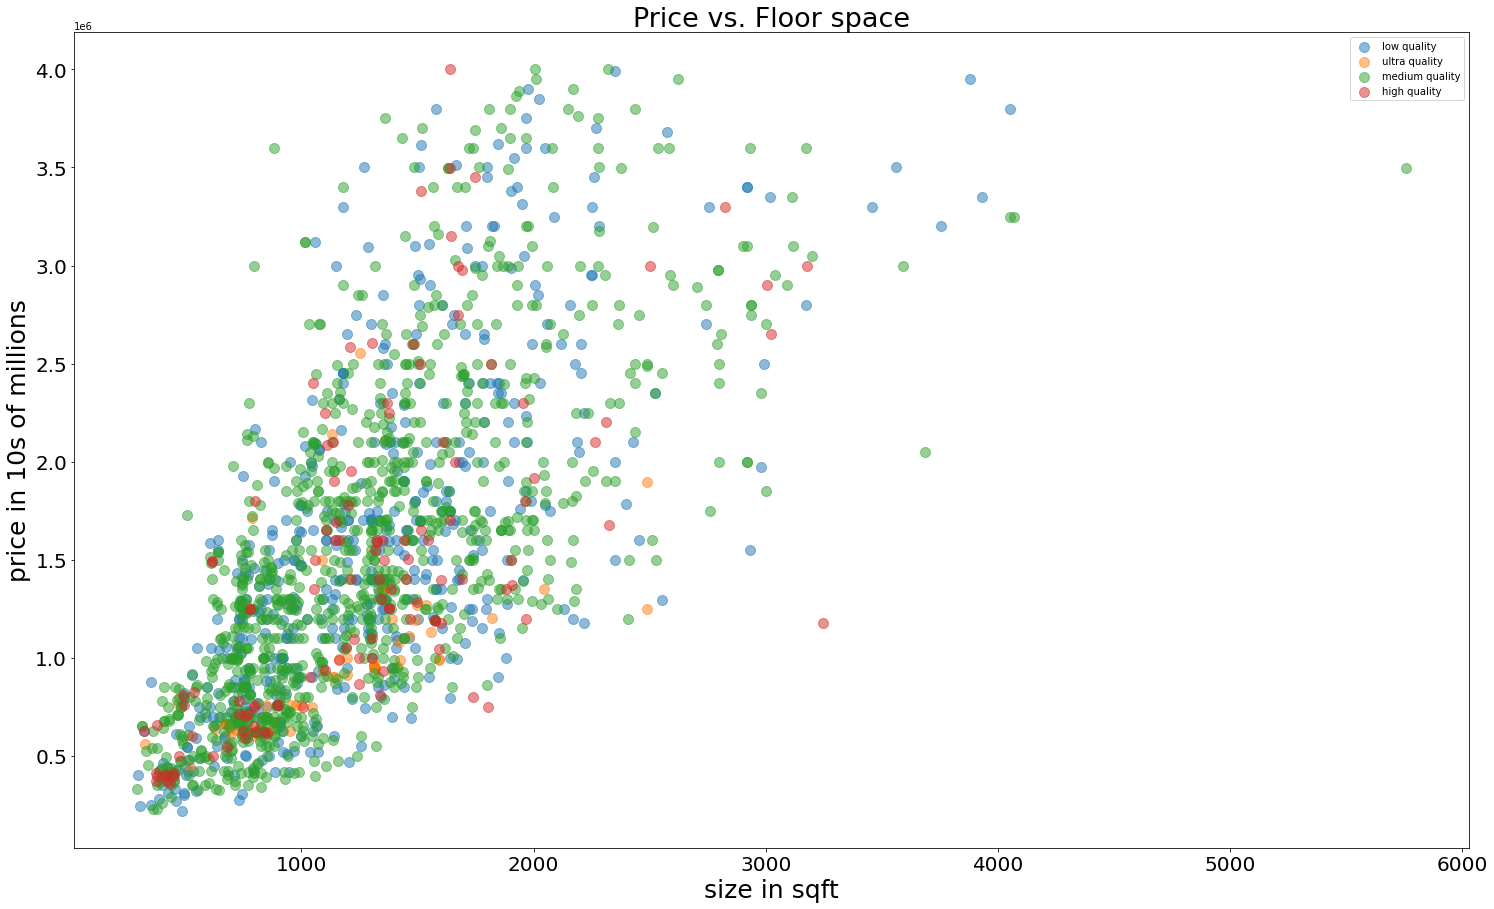

In [4]:
property_data_sample = property_data.loc[property_data['size_in_sqft'] < 2000]

property_data_sample = property_data.loc[property_data['price'] < 4000000]

lowq = property_data_sample[property_data_sample['quality'] == 'Low'].sort_values(by='size_in_sqft', ascending = False).reset_index()

mediumq = property_data_sample[property_data_sample['quality'] == 'Medium'].sort_values(by='size_in_sqft', ascending = False).reset_index()

highq = property_data_sample[property_data_sample['quality'] == 'High'].sort_values(by='size_in_sqft', ascending = False).reset_index()

ultraq = property_data_sample[property_data['quality'] == 'Ultra'].sort_values(by='size_in_sqft', ascending = False).reset_index()



#ultraq_graph = ultraq.drop([0,1,2,3])

#highq_graph = highq.drop([0,1,2,3])

#lowq_graph = lowq.drop([0,1,2,3])

#mediumq_graph = mediumq.drop([0,1,2,3])

plt.figure(figsize=(25,15))

plt.tick_params(axis='both', which = 'major', labelsize= 20)

plt.xlabel('size in sqft', fontsize = 25)

plt.ylabel('price in 10s of millions', fontsize = 25)

plt.title('Price vs. Floor space', fontsize = 27)

plt.scatter(lowq.size_in_sqft, lowq.price, alpha = 0.5, s = 100)

plt.scatter(ultraq.size_in_sqft, ultraq.price, alpha = 0.5, s = 100)

plt.scatter(mediumq.size_in_sqft, mediumq.price, alpha = 0.5, s = 100)

plt.scatter(highq.size_in_sqft, highq.price, alpha = 0.5, s = 100)

plt.legend(['low quality','ultra quality', 'medium quality', 'high quality'])

Index(['Downtown Dubai', 'Dubai Marina', 'Jumeirah Village Circle',
       'Palm Jumeirah', 'Jumeirah Beach Residence', 'Business Bay',
       'Jumeirah Lake Towers', 'Dubai Hills Estate', 'The Views', 'Jumeirah',
       'Dubai Creek Harbour (The Lagoons)', 'Mohammed Bin Rashid City', 'DIFC',
       'Greens', 'Dubai Harbour', 'Motor City', 'Town Square',
       'Dubai Sports City', 'Al Furjan', 'DAMAC Hills', 'Old Town', 'Meydan',
       'City Walk', 'Umm Suqeim', 'Dubai Silicon Oasis', 'Dubai Land',
       'Culture Village', 'Arjan', 'The Hills', 'Al Barari', 'Al Sufouh',
       'Bluewaters', 'Discovery Gardens', 'World Trade Center',
       'Dubai Production City (IMPZ)', 'Al Kifaf', 'Mirdif',
       'International City', 'Remraam', 'Dubai South (Dubai World Central)',
       'Dubai Festival City', 'Al Barsha', 'Mudon', 'Barsha Heights (Tecom)',
       'Falcon City of Wonders', 'Jumeirah Village Triangle', 'Jebel Ali',
       'Jumeirah Golf Estates', 'Green Community', 'Dubai Healthc

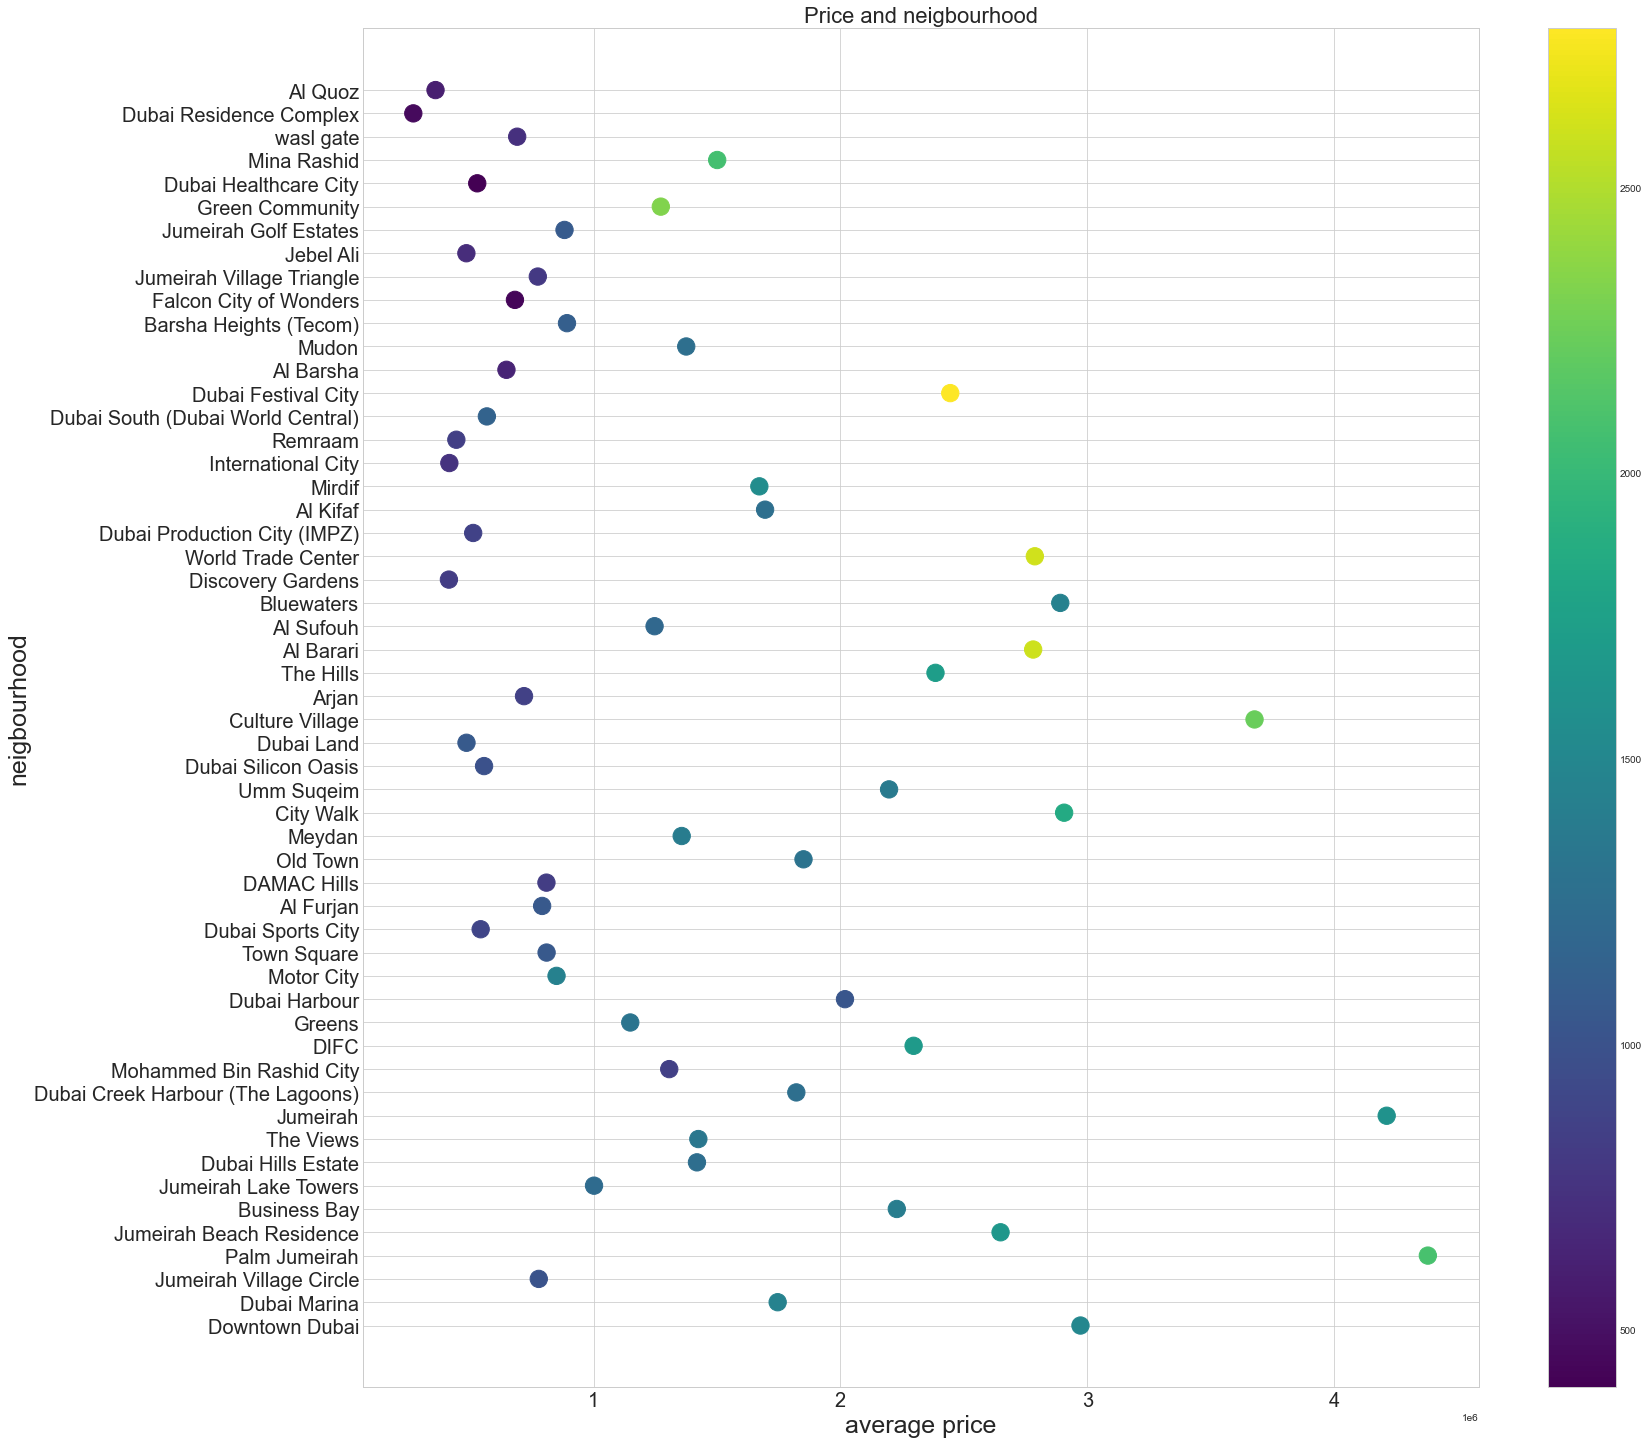

In [5]:
#sns.scatterplot(x=property_data.size_in_sqft, y=property_data.price) 
neighbourhoods = property_data.neighborhood.value_counts()

neighbourhoods_amount = neighbourhoods.to_dict()

neighbourhoods = neighbourhoods.keys()


avg_sqft =[]
avg_prices = []
lenghts = []

        #avg_sqft.append(average_sqft)
        #average_sqft = ((n_neighbourhood.size_in_sqft.sum())/amount)

for n in neighbourhoods:
        n_neighbourhood = property_data[property_data['neighborhood'] == n]
        amount = len(n_neighbourhood)
        average_price = ((n_neighbourhood.price.sum())/amount)
        avg_prices.append(average_price)
        average_sqft = ((n_neighbourhood.size_in_sqft.sum())/amount)
        avg_sqft.append(average_sqft)
        lenghts.append(amount)
        

d = {'neigbourhood': neighbourhoods, 'average_price':avg_prices, 'average_sqft': avg_sqft}

plt.style.use('seaborn-whitegrid')

df_neigbourhood = pd.DataFrame(data=d)

df_neigbourhood

plt.figure(figsize=(25,25))


plt.scatter(df_neigbourhood.average_price, neighbourhoods, c = df_neigbourhood.average_sqft, cmap='viridis', s = 300 )



plt.tick_params(axis='both', which = 'major', labelsize= 20)

plt.xlabel('average price', fontsize = 25)

plt.ylabel('neigbourhood', fontsize = 25)

plt.title('Price and neigbourhood', fontsize = 22)

plt.colorbar()

#plt.legend(list(df_neigbourhood.average_sqft))

print(neighbourhoods)

In [6]:
#sns.scatterplot(x=property_data.size_in_sqft, y=property_data.price) 
neighbourhoods = property_data.neighborhood.value_counts()

neighbourhoods_amount = neighbourhoods.to_dict()

neighbourhoods = neighbourhoods.keys()


avg_sqft =[]
avg_prices = []

        #avg_sqft.append(average_sqft)
        #average_sqft = ((n_neighbourhood.size_in_sqft.sum())/amount)

for n in neighbourhoods:
        n_neighbourhood = property_data[property_data['neighborhood'] == n]
        amount = len(n_neighbourhood)
        average_price = ((n_neighbourhood.price.sum())/amount)
        avg_prices.append(average_price)
        average_sqft = ((n_neighbourhood.size_in_sqft.sum())/amount)
        avg_sqft.append(average_sqft)
        

d = {'neigbourhood': neighbourhoods, 'average_price':avg_prices, 'average_sqft': avg_sqft}

plt.style.use('seaborn-whitegrid')

df_neigbourhood = pd.DataFrame(data=d)

In [7]:

downtown_dubai_neighbourhood = property_data[property_data['neighborhood'] == 'Downtown Dubai']

downtown_dubai_neighbourhood

downtown_dubai_neighbourhood = downtown_dubai_neighbourhood.assign(no_of_bedrooms_squared= property_data.no_of_bedrooms * property_data.no_of_bedrooms)

downtown_dubai_neighbourhood = downtown_dubai_neighbourhood.assign(bedrooms_bathrooms = property_data.no_of_bedrooms / property_data.no_of_bathrooms)

regressors = downtown_dubai_neighbourhood.drop([ 'id',
 'latitude',
 'longitude',
 'neighborhood',
 'price',
 'quality',
 'maid_room',
 'unfurnished',
 'balcony',
 'barbecue_area',
 'built_in_wardrobes',
 'central_ac',
 'childrens_play_area',
 'childrens_pool',
 'concierge',
 'covered_parking',
 'kitchen_appliances',
 'lobby_in_building',
 'maid_service',
 'networked',
 'pets_allowed',
 'private_garden',
 'private_gym',
 'private_jacuzzi',
 'private_pool',
 'security',
 'shared_gym',
 'shared_pool',
 'shared_spa',
 'study',
 'vastu_compliant',
 'view_of_landmark',
 'view_of_water',
 'walk_in_closet'],axis=1)

regressors = list(regressors.columns.values)



#y = deliviries_data['total_runs']

#deliviries_data_nonna = deliviries_data.dropna()

X_data = downtown_dubai_neighbourhood.drop(['id',
 'latitude',
 'longitude',
 'neighborhood',
 'price',
 'quality',
 'maid_room',
 'unfurnished',
 'balcony',
 'barbecue_area',
 'built_in_wardrobes',
 'central_ac',
 'childrens_play_area',
 'childrens_pool',
 'concierge',
 'covered_parking',
 'kitchen_appliances',
 'lobby_in_building',
 'maid_service',
 'networked',
 'pets_allowed',
 'private_garden',
 'private_gym',
 'private_jacuzzi',
 'private_pool',
 'security',
 'shared_gym',
 'shared_pool',
 'shared_spa',
 'study',
 'vastu_compliant',
 'view_of_landmark',
 'view_of_water',
 'walk_in_closet'], axis=1)

y_data = downtown_dubai_neighbourhood['price']

X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=.3, random_state=45)

clf = linear_model.SGDOneClassSVM(random_state=42)

Price_train = clf.fit(X_train)

Price_test = clf.predict(X_test)

MSE = mean_squared_error(y_test, Price_test)

R_squared = r2_score(y_test, Price_test)

clf_full = list(clf.coef_)  

data = {'Regressor': regressors, 'coefficient': clf_full }


regression_stats = pd.DataFrame.from_dict(data)

print(regression_stats)
print('')
print('MSE =' + str(MSE))
print('')
print('Rsquared =' + str(R_squared))


                Regressor  coefficient
0            size_in_sqft     2.148556
1          price_per_sqft     4.632898
2          no_of_bedrooms     0.003155
3         no_of_bathrooms     0.006310
4  no_of_bedrooms_squared     0.003155
5      bedrooms_bathrooms     0.001578

MSE =13801910608832.9

Rsquared =-1.2244003969445636


Text(0.5, 1.0, 'Price vs. Floor space')

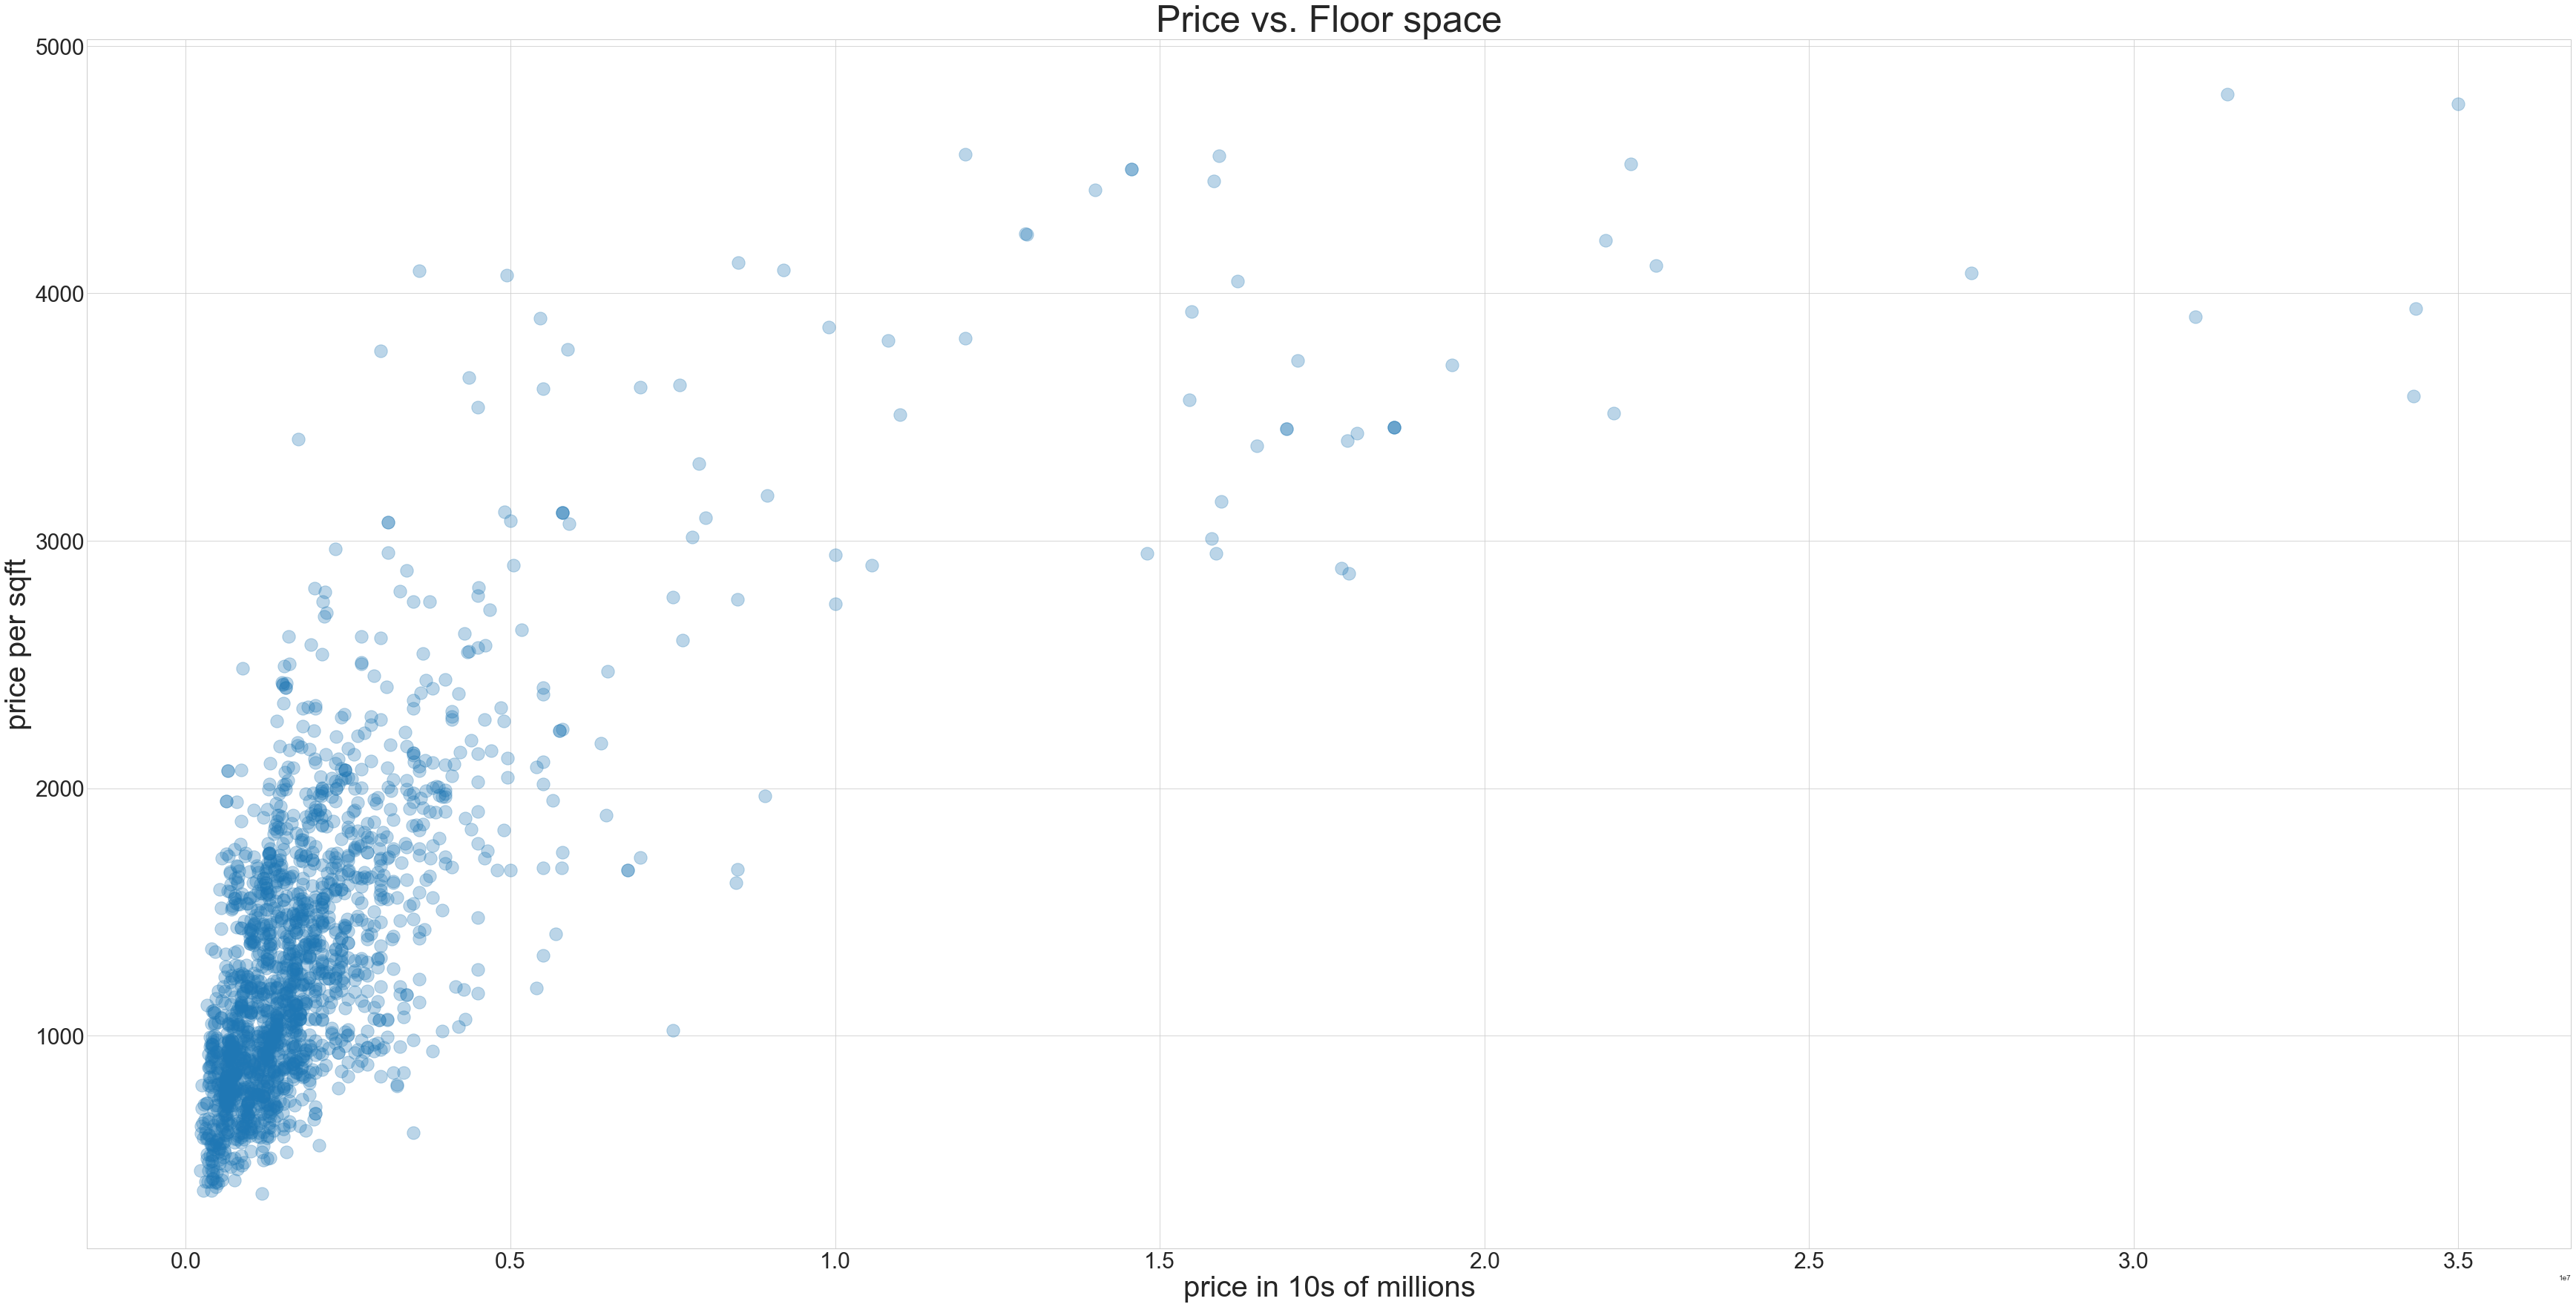

In [8]:
plt.figure(figsize=(60,30))

plt.scatter(property_data.price, property_data.price_per_sqft, s = 300, alpha = 0.3)


plt.tick_params(axis='both', which = 'major', labelsize= 30)

plt.xlabel('price in 10s of millions', fontsize = 40)

plt.ylabel('price per sqft', fontsize = 40)

plt.title('Price vs. Floor space', fontsize = 50)

#plt.legend(['no gym', 'gym'])

#plt.colorbar()

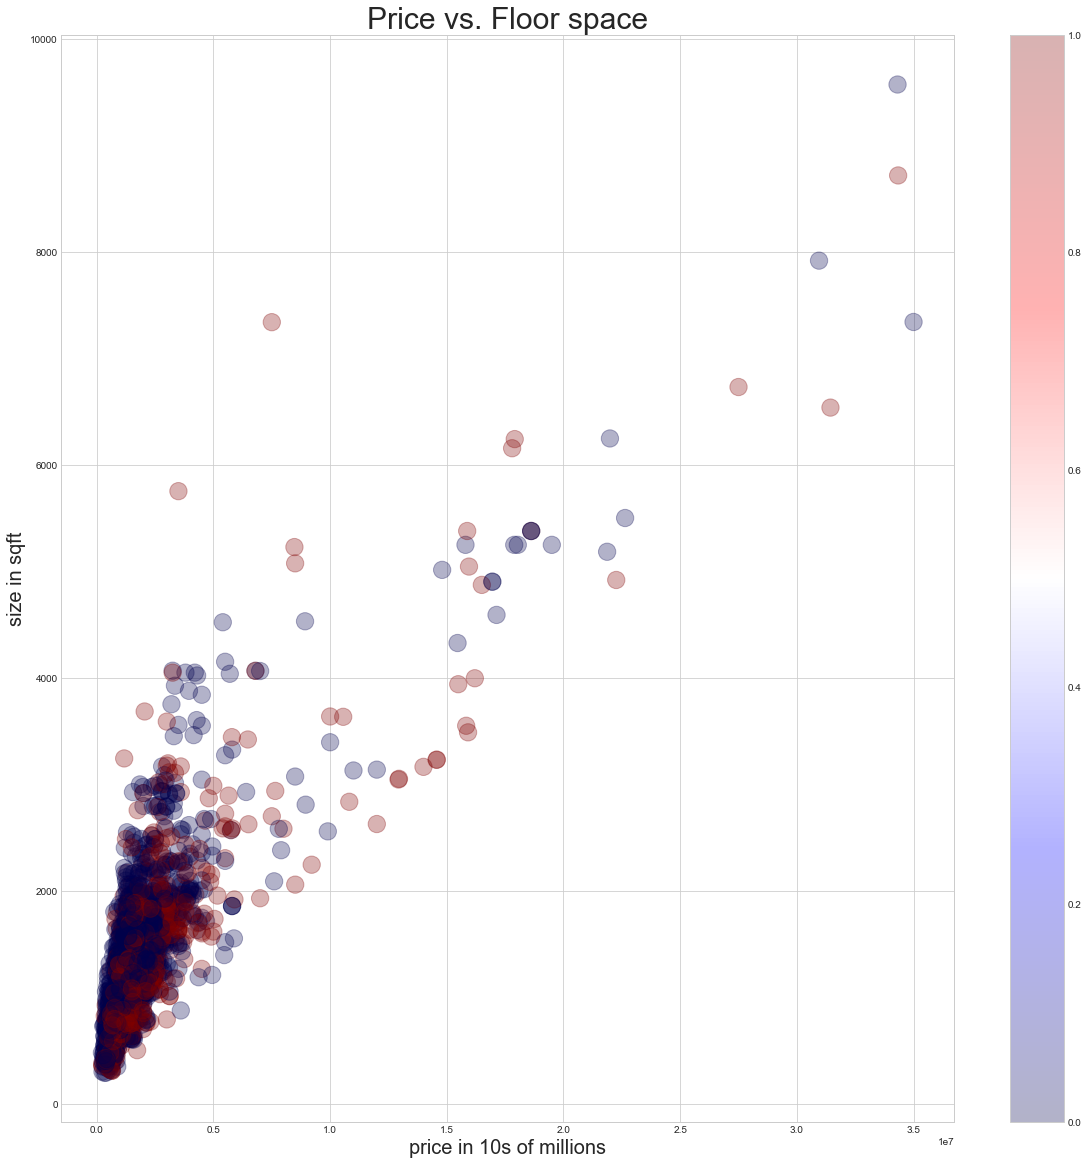

In [9]:
plt.figure(figsize=(20,20))

plt.scatter(property_data.price, property_data.size_in_sqft, c = property_data.view_of_water, s = 300, alpha = 0.3, cmap='seismic')

plt.xlabel('price in 10s of millions', fontsize = 20)

plt.ylabel('size in sqft', fontsize = 20)

plt.title('Price vs. Floor space', fontsize = 30)

#plt.legend(['no gym', 'gym'])

plt.colorbar()

In [10]:
property_data = property_data.assign(no_of_bedrooms_squared= property_data.no_of_bedrooms * property_data.no_of_bedrooms)

property_data = property_data.assign(bedrooms_bathrooms = property_data.no_of_bedrooms / property_data.no_of_bathrooms)

average_price =  property_data.price.sum()/len(property_data.price)

regressors = property_data.drop([ 'id',
 'latitude',
 'longitude',
 'neighborhood',
 'price',
 'quality',
 'maid_room',
 'unfurnished',
 'balcony',
 'barbecue_area',
 'built_in_wardrobes',
 'central_ac',
 'childrens_play_area',
 'childrens_pool',
 'concierge',
 'covered_parking',
 'kitchen_appliances',
 'lobby_in_building',
 'maid_service',
 'networked',
 'pets_allowed',
 'private_garden',
 'private_gym',
 'private_jacuzzi',
 'private_pool',
 'security',
 'shared_gym',
 'shared_pool',
 'shared_spa',
 'study',
 'vastu_compliant',
 'view_of_landmark',
 'view_of_water',
 'walk_in_closet'],axis=1)

regressors = list(regressors.columns.values)



#y = deliviries_data['total_runs']

#deliviries_data_nonna = deliviries_data.dropna()

X_data = property_data.drop(['id',
 'latitude',
 'longitude',
 'neighborhood',
 'price',
 'quality',
 'maid_room',
 'unfurnished',
 'balcony',
 'barbecue_area',
 'built_in_wardrobes',
 'central_ac',
 'childrens_play_area',
 'childrens_pool',
 'concierge',
 'covered_parking',
 'kitchen_appliances',
 'lobby_in_building',
 'maid_service',
 'networked',
 'pets_allowed',
 'private_garden',
 'private_gym',
 'private_jacuzzi',
 'private_pool',
 'security',
 'shared_gym',
 'shared_pool',
 'shared_spa',
 'study',
 'vastu_compliant',
 'view_of_landmark',
 'view_of_water',
 'walk_in_closet'], axis=1)

y_data = property_data['price']

X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=.3, random_state=45)

ols_model = LinearRegression()

#clf = linear_model.SGDOneCla(random_state=42)

Price_train = ols_model.fit(X_train, y_train)

Price_test = ols_model.predict(X_test)

MSE = mean_squared_error(y_test, Price_test)

R_squared = r2_score(y_test, Price_test)

ols_model_full = list(ols_model.coef_)  

data = {'Regressor': regressors, 'coefficient': clf_full }


regression_stats = pd.DataFrame.from_dict(data)

print(regression_stats)
print('')
print('MSE =' + str(MSE/average_price))
print('')
print('Rsquared =' + str(R_squared))





                Regressor  coefficient
0            size_in_sqft     2.148556
1          price_per_sqft     4.632898
2          no_of_bedrooms     0.003155
3         no_of_bathrooms     0.006310
4  no_of_bedrooms_squared     0.003155
5      bedrooms_bathrooms     0.001578

MSE =538523.2869576013

Rsquared =0.8748519584259713


In [11]:

types = list(property_data.quality.unique())



In [12]:
property_data = property_data.replace(['Medium', 'Low', 'High', 'Ultra'], [1,0,2,3])



In [13]:
from sklearn.neighbors import KNeighborsClassifier

X_data = property_data[['price','size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms' ]]

y_data = property_data.quality



X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=.1, random_state=45)

class_train = y_train
class_test = y_test

knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X_train, class_train)

prediction = knn.predict(X_test)

prediction = list(prediction)

Testing = {'price': X_test.price, 'size_in_sqft': X_test.size_in_sqft, 'prediction' : prediction, 'true_value' : class_test}

Testing = pd.DataFrame.from_dict(Testing)

Testing = Testing.assign(difference = Testing.prediction-Testing.true_value)

def result(value):
    if value == 0:
        return 1
    else:
        return 0
    
Testing['correct'] = Testing['difference'].map(result)

#df['salary_stats'] = df['salary'].map(salary_stats)

Testing.difference.mean()


0.09424083769633508

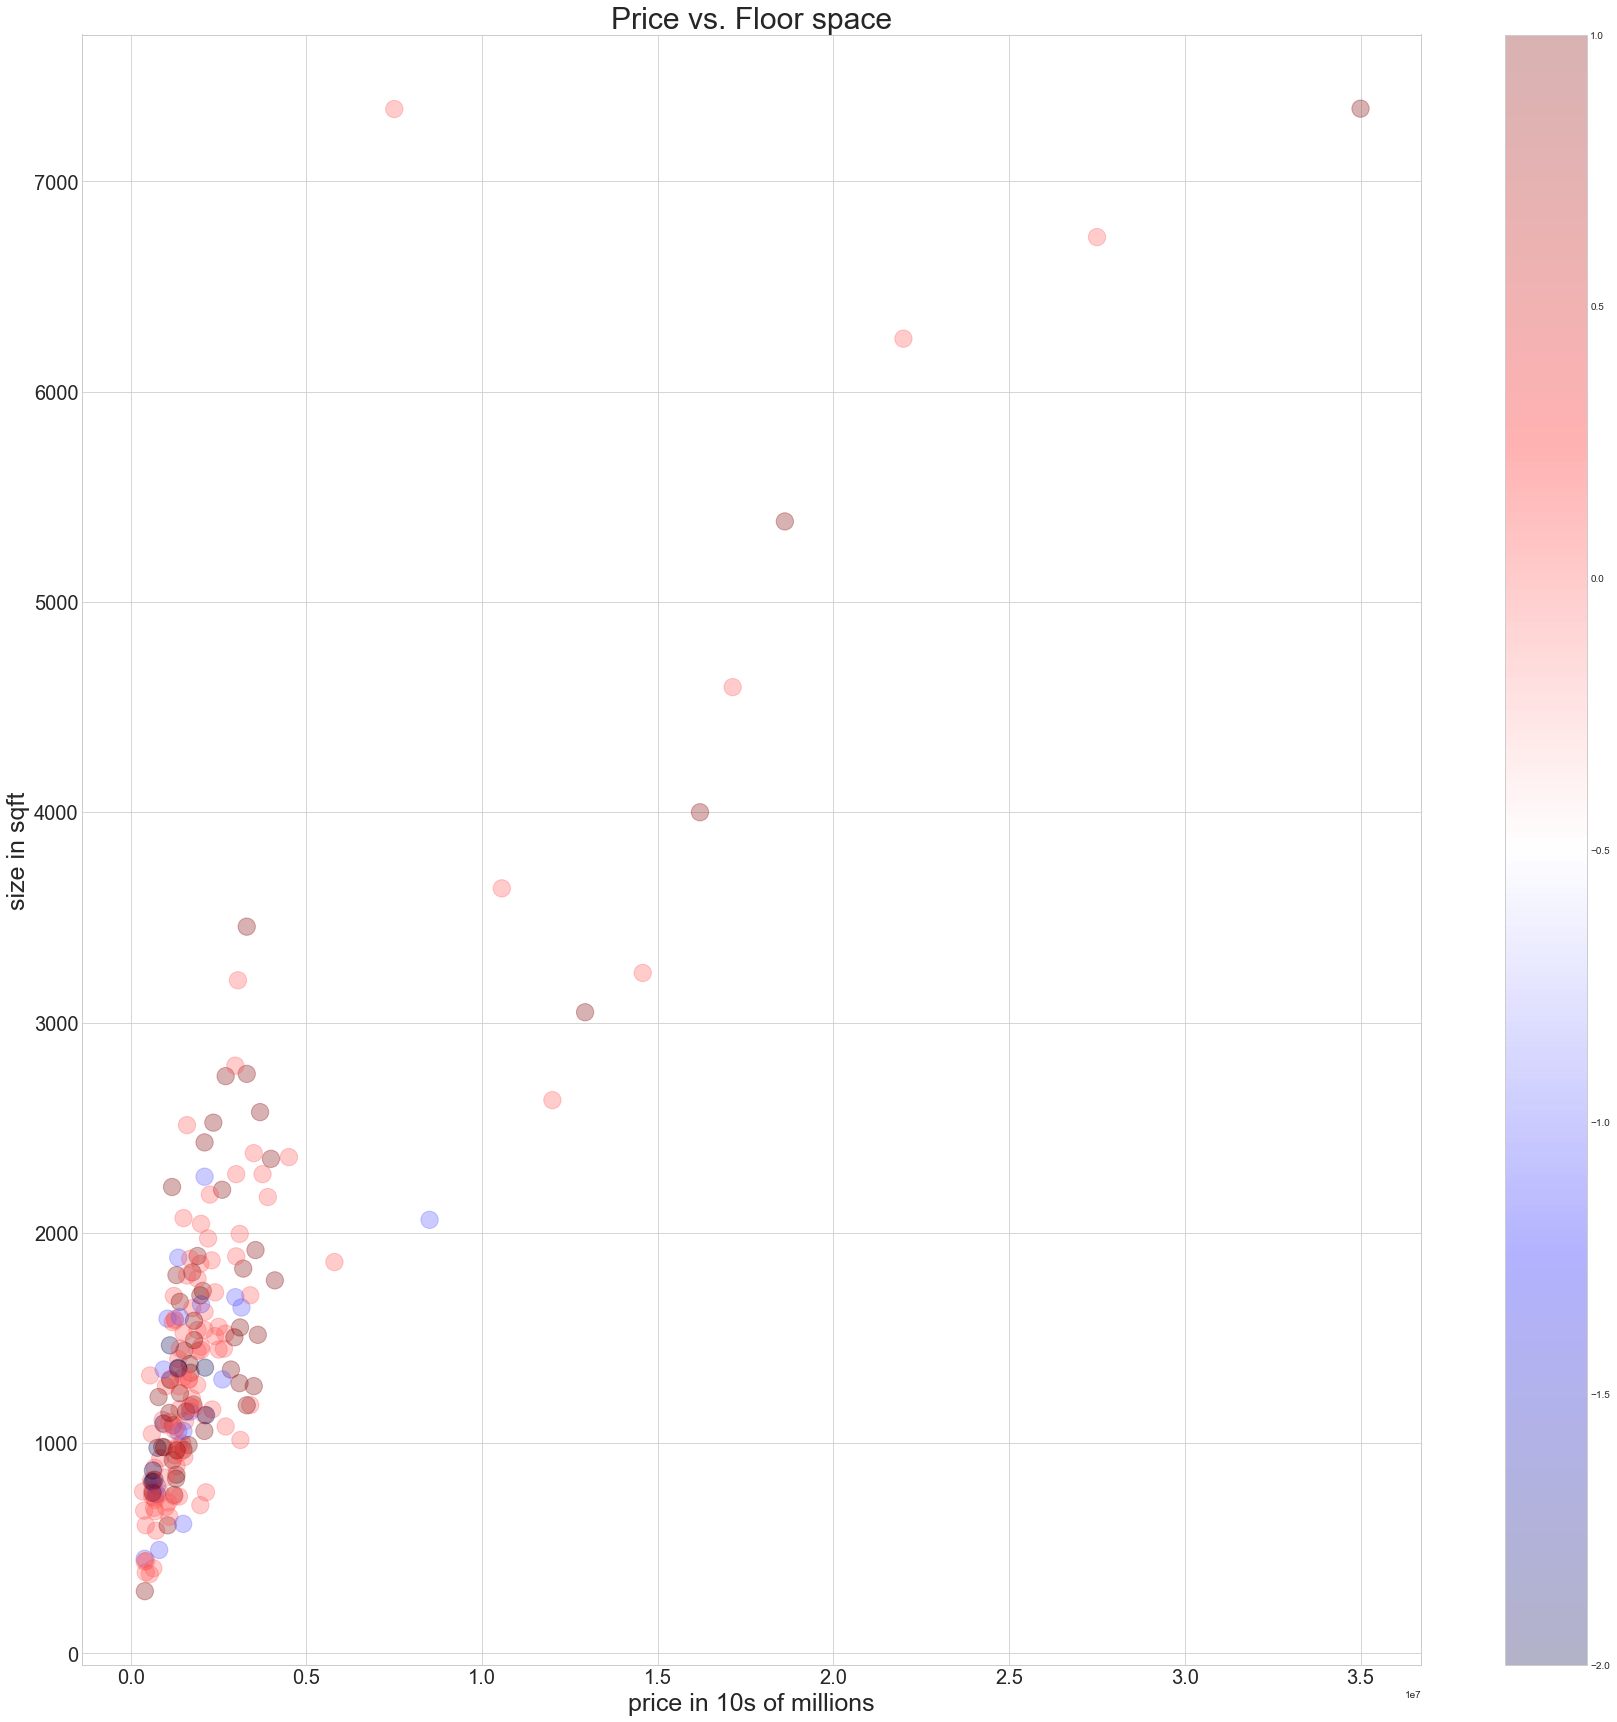

In [14]:
plt.figure(figsize=(30,30))

plt.scatter(Testing.price, Testing.size_in_sqft, c = Testing.difference, s = 300, alpha = 0.3, cmap='seismic')

plt.tick_params(axis='both', which = 'major', labelsize= 20)

plt.xlabel('price in 10s of millions', fontsize = 25)

plt.ylabel('size in sqft', fontsize = 25)

plt.title('Price vs. Floor space', fontsize = 30)

#plt.legend(['no gym', 'gym'])

plt.colorbar()

In [15]:
X_data = property_data[['price','size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms' ]]

y_data = property_data.quality



X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=.1, random_state=45)

class_train = y_train
class_test = y_test

from sklearn.tree import DecisionTreeRegressor

regression_model = DecisionTreeRegressor(criterion="squared_error",min_samples_leaf=20)

#Fit the model
regression_model.fit(X_train,y_train)


#Predict unseen query instances
predicted = regression_model.predict(X_test)

#Compute and plot the RMSE

RMSE = np.sqrt(np.sum(((y_test-predicted)**2)/len(y_test)))
RMSE

0.7783406330564819

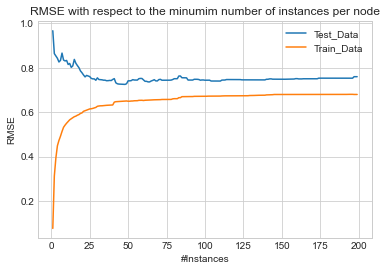

In [16]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

for i in range(1,200):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="squared_error",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(X_train,y_train)
    #Predict query instances
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((y_train-predicted_train)**2)/len(y_train))))
    RMSE_test.append(np.sqrt(np.sum(((y_test-predicted_test)**2)/len(y_test))))


   
ax0.plot(range(1,200),RMSE_test,label='Test_Data')
ax0.plot(range(1,200),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()